In [1]:
require(tidyverse)

Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
A <- read.csv(file = 'table_export_DATA_JAN2020_CORRECTED.csv')

In [3]:
str(A)

'data.frame':	192861 obs. of  13 variables:
 $ POST_DATE       : Factor w/ 31 levels "01/01/2020","01/02/2020",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ EMP_NUM         : int  825192 825192 848648 848648 848648 848648 848648 848648 848648 848648 ...
 $ SUP_EMP_NUM     : int  828647 828647 891127 891127 891127 891127 891127 891127 891127 891127 ...
 $ WORK_ORDER      : int  165378725 165378725 165665543 165690573 165697024 165697025 165697027 165697028 165697029 165724901 ...
 $ OPERATION_NUM   : int  80 80 110 320 110 110 110 110 110 320 ...
 $ QUANTITY        : int  1 1 6 6 6 6 6 6 6 6 ...
 $ HRS             : num  -9.6 9.6 0.5 0.57 0.31 0.51 0.32 0.5 0.51 0.57 ...
 $ HRS_CLASS       : Factor w/ 3 levels "R","S","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ TYPE            : Factor w/ 4 levels "ZP03","ZP06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PRODUCT_LINE    : int  27 27 28 28 28 28 28 28 28 28 ...
 $ PRODUCT_CELL_ID : int  801 801 318 338 318 318 318 318 318 338 ...
 $ ROUTING_GROUP_ID: int  4897 4897 994 1170 99

In [4]:
summary(A)

      POST_DATE         EMP_NUM        SUP_EMP_NUM       WORK_ORDER       
 01/16/2020:  9822   Min.   :603837   Min.   :818654   Min.   :164112551  
 01/29/2020:  9674   1st Qu.:823654   1st Qu.:837685   1st Qu.:165769085  
 01/15/2020:  9401   Median :841274   Median :849797   Median :165813631  
 01/09/2020:  9393   Mean   :846593   Mean   :858010   Mean   :165796551  
 01/22/2020:  9292   3rd Qu.:872963   3rd Qu.:884346   3rd Qu.:165859406  
 01/28/2020:  9253   Max.   :894746   Max.   :891127   Max.   :165953670  
 (Other)   :136026                                                        
 OPERATION_NUM       QUANTITY             HRS         HRS_CLASS    TYPE       
 Min.   :   1.0   Min.   :   1.000   Min.   :-9.600   R:161489   ZP03:192157  
 1st Qu.:  45.0   1st Qu.:   1.000   1st Qu.: 0.100   S:    33   ZP06:   151  
 Median : 100.0   Median :   1.000   Median : 0.220   T: 31339   ZRTN:   193  
 Mean   : 212.4   Mean   :   6.006   Mean   : 0.383              ZRW3:   360  
 3rd 

In [5]:
sum(is.na(A))

[1] 0

In [6]:
A$POST_DATE <- as.Date(A$POST_DATE)
A$PRODUCT_LINE <- as.factor(A$PRODUCT_LINE)

In [7]:
arrange(A,HRS)

POST_DATE,EMP_NUM,SUP_EMP_NUM,WORK_ORDER,OPERATION_NUM,QUANTITY,HRS,HRS_CLASS,TYPE,PRODUCT_LINE,PRODUCT_CELL_ID,ROUTING_GROUP_ID,DOC
<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
0001-01-20,825192,828647,165378725,80,1,-9.60,R,ZP03,27,801,4897,M113733
0001-02-20,872575,849797,165783416,30,1,-9.38,R,ZP03,71,433,3897,M101090
0001-02-20,872575,849797,165783416,30,1,-9.18,R,ZP03,71,433,3897,M101090
NA,843294,849797,165924827,40,10,-7.90,R,ZP03,72,378,2319,M101126
0001-02-20,874898,883421,165705035,54,1,-7.40,R,ZP03,53,821,4423,M106480
0001-02-20,872575,849797,165783416,30,1,-7.13,R,ZP03,71,433,3897,M101090
NA,818381,828647,165767900,80,1,-6.00,R,ZP03,27,801,4897,M113733
0001-08-20,829338,828647,165207112,80,1,-5.50,R,ZP03,27,801,4897,M113733
NA,886321,818777,165741037,270,8,-5.32,R,ZP03,25,412,341,M117877


In [8]:
arrange(A,desc(QUANTITY))

POST_DATE,EMP_NUM,SUP_EMP_NUM,WORK_ORDER,OPERATION_NUM,QUANTITY,HRS,HRS_CLASS,TYPE,PRODUCT_LINE,PRODUCT_CELL_ID,ROUTING_GROUP_ID,DOC
<date>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
0001-02-20,894437,818777,165761891,100,1184,1.63,R,ZP03,25,414,345,M106551
0001-02-20,880833,818777,165761891,90,1184,-0.20,R,ZP03,25,414,345,M113804
0001-02-20,880833,818777,165761891,90,1184,0.20,R,ZP03,25,414,345,M113804
0001-02-20,880833,818777,165761891,90,1184,0.20,R,ZP03,25,414,345,M113804
0001-02-20,880833,818777,165761891,100,1184,0.31,R,ZP03,25,414,345,M106551
0001-02-20,880833,818777,165761891,100,1184,0.31,R,ZP03,25,414,345,M106551
0001-02-20,880833,818777,165761891,100,1184,-0.31,R,ZP03,25,414,345,M106551
0001-03-20,823654,818777,165761891,110,1184,0.61,T,ZP03,25,414,345,M106527
0001-03-20,823654,818777,165761891,110,1184,1.81,T,ZP03,25,414,345,M106527


In [9]:
B <- A[,-c(1,2,3,4,13)]

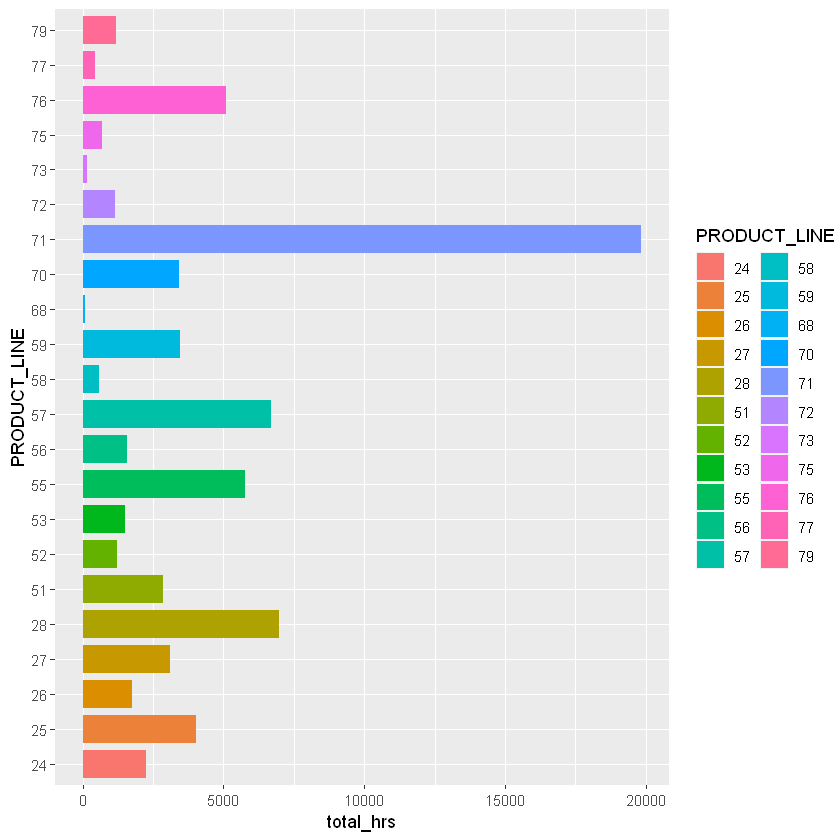

In [23]:
C <- group_by(B,PRODUCT_LINE)
Z <- arrange(summarise(C,total_hrs = sum(HRS)),total_hrs)
library(ggplot2)
ggplot(data = Z) + geom_bar(stat = "identity",width = 0.8,aes(x = PRODUCT_LINE , y = total_hrs,fill = PRODUCT_LINE)) + coord_flip()

In [11]:
D <- group_by(B,ROUTING_GROUP_ID)
E <- arrange(summarise(D,count = n(),total_hrs_per_part = sum(HRS),total_hrs_per_part))
arrange(E,desc(total_hrs_per_part))


ROUTING_GROUP_ID,count,total_hrs_per_part
<int>,<int>,<dbl>
1636,7965,2861.97
1709,12904,2192.37
728,2632,1380.40
2488,3772,1152.18
1240,7534,989.45
641,1861,778.04
5191,1217,767.70
2292,3353,754.34
1170,1645,611.98


In [12]:
F <- group_by(B,TYPE)
arrange(summarise(F,count = n(),total_hrs_operation = sum(HRS)),total_hrs_operation)

TYPE,count,total_hrs_operation
<fct>,<int>,<dbl>
ZP06,151,43.68
ZRTN,193,82.24
ZRW3,360,124.96
ZP03,192157,73614.70


In [13]:
A$EMP_NUM <- as.factor(A$EMP_NUM)
G <- group_by(A,EMP_NUM)
H <- arrange(summarise(G,count=n(),total_hrs_worked = sum(HRS)),total_hrs_worked)
arrange(H,desc(total_hrs_worked))

EMP_NUM,count,total_hrs_worked
<fct>,<int>,<dbl>
822961,364,244.64
818560,490,240.08
818948,708,232.66
874614,485,232.31
830642,175,227.89
840677,163,226.82
871905,374,226.09
823352,716,217.14
818674,135,217.05


In [14]:
filter(H,count < 50)


EMP_NUM,count,total_hrs_worked
<fct>,<int>,<dbl>
839891,1,0.01
892098,1,0.01
818377,2,0.03
894746,1,0.03
822960,2,0.04
818701,7,0.09
818577,2,0.17
880161,1,0.25
818520,2,0.30


In [16]:
Q <- filter(A,HRS < 0)
W <- group_by(Q,PRODUCT_LINE)
R <- group_by(Q,EMP_NUM)
S <- group_by(Q,ROUTING_GROUP_ID)

In [20]:
arrange(summarise(W,count = n(),hrs = -sum(HRS)),hrs)

PRODUCT_LINE,count,hrs
<fct>,<int>,<dbl>
68,1,0.67
75,12,5.46
73,4,5.96
58,21,10.38
77,47,24.88
79,81,25.85
72,45,27.76
52,29,34.92
56,139,44.44


In [21]:
arrange(summarise(R,count = n(),hrs = -sum(HRS)),hrs)

EMP_NUM,count,hrs
<fct>,<int>,<dbl>
850387,2,0.05
881215,1,0.05
824397,6,0.07
830846,2,0.08
818489,3,0.09
818631,2,0.10
872591,1,0.12
846298,1,0.14
840093,9,0.15


In [22]:
arrange(summarise(S,count = n(),hrs = -sum(HRS)),hrs)

ROUTING_GROUP_ID,count,hrs
<int>,<int>,<dbl>
4775,1,0.01
1444,1,0.05
2057,3,0.05
2557,1,0.05
2472,1,0.07
1032,1,0.08
1671,1,0.08
2433,1,0.08
3569,2,0.08
